# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

En este caso nos vamos a centrar en el **método jerárquico**. Este método puede ser aglomerativo o divisivo, dependiendo si partimos de cluster individuales que se van conbinando y que convergen en uno solo o divisivo si es de forma opuesta. 

La gran diferencia con el método K-means es que este no requiere que se especifique de forma previa con cuantos cluster queremos contar. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **VarCovid**, elaborado a partir de los datos publicados por el INE.

## **Jerárquico**

Cargamos las librerias que vamos a utilizar en el modelo.

In [53]:
# Preparación de los datos 
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
# Modelado 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
# Visualización
import matplotlib.pyplot as plt


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **VarCovid**.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving VarCovid.xlsx to VarCovid.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [54]:
datos=pd.read_excel('VarCovid.xlsx')
datos.head()

,ccaa,2020SM20,2020SM53,1Ola,2Ola,3Ola
0,Total nacional,26.0,20.0,77.0,18.6,25.3
1,Andalucía,4.5,12.8,16.7,21.9,27.8
2,Aragón,22.3,24.0,57.5,41.5,21.9
3,"Asturias, Principado de",9.8,14.7,25.6,22.1,20.9
4,"Balears, Illes",1.9,9.1,16.6,15.2,23.1


Creamos las diferentes variables que vamos a utilizar. En este caso, en la variable columnas, seleccionaremos la tasa de variación del exceso de mortalidad de la primera ola y segunda ola. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas.

In [55]:
columnas = ["1Ola", "2Ola"]
resultado = datos[columnas]
comunidades = datos["ccaa"]

### **Dendrograma**
Para representar gráficamente nuestro modelo, escogeremos una tipología como la del dendrograma, ya que nos permitirá observar los dintintos cluster que se han formado, las relaciones entre las diferentes variables y la distancia entre unas y otras. 

Además, en nuestro caso seleccionaremos que las variables se situen a la izquierda, es decir, situaremos el dendrograma a la derecha, para que podamos leer las variables sin ningún tipo de problema. 

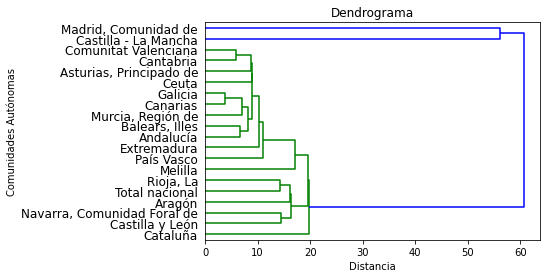

In [56]:
W = hierarchy.linkage(resultado, 'single')
dendrograma = sch.dendrogram(W,labels=np.array(comunidades),orientation='right')

plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Comunidades Autónomas')
plt.show()


### **Matriz de distancias**
Para ver numéricamente la distancia entre nuestras variables (CCAA), realizamos la matriz de distancias, la cual nos muestra la distancia euclídea entre los puntos analizados, siendo una matriz *n x n*.

Inicialmente tenemos el vector con las distancias entre los datos analizados, a través de **pdist( )**. Posteriormente, **squareform( )** convierte el vector de distancia en una matriz de distancia. Por último, contruimos nuestra matriz. 

In [57]:
dist=pdist(resultado)  

DIST=squareform(dist) 

df=pd.DataFrame(DIST,index=comunidades,columns=comunidades) 
pd.set_option('precision',1)
df.head()

ccaa,Total nacional,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",Ceuta,Melilla
ccaa,,,,,,,,,,,,,,,,,,,,
Total nacional,0.0,60.4,30.1,51.5,60.5,69.1,46.5,30.3,105.9,45.3,51.0,34.9,67.2,162.1,68.4,16.3,25.9,14.3,44.4,55.4
Andalucía,60.4,0.0,45.3,9.0,6.7,14.7,18.7,89.3,166.3,105.7,12.9,25.5,16.3,222.4,9.6,76.4,35.3,49.7,17.3,22.9
Aragón,30.1,45.3,0.0,37.3,48.6,58.5,40.9,50.3,127.5,69.3,42.1,25.4,58.2,182.8,54.8,41.1,27.3,16.2,28.4,30.6
"Asturias, Principado de",51.5,9.0,37.3,0.0,11.3,21.2,13.2,80.4,157.3,96.8,8.8,16.5,21.3,213.4,17.9,67.4,26.6,40.8,8.9,20.4
"Balears, Illes",60.5,6.7,48.6,11.3,0.0,9.8,15.5,90.1,166.4,105.7,9.9,26.3,10.3,222.6,8.1,76.7,34.7,51.0,20.2,29.1


Vamos a asignar los cluster a las CCAA.

t es la altura donde queremos realizar el corte en nuestro dendrograma.

Y le decimos que aplique un criterio de distancia

In [58]:
clusters = fcluster(W, t=19, criterion='distance')
clusters

array([1, 2, 1, 2, 2, 2, 2, 1, 4, 3, 2, 2, 2, 5, 2, 1, 2, 1, 2, 2],
      dtype=int32)

In [59]:
clusters_ccaa=pd.concat([comunidades,pd.DataFrame(clusters)],axis=1)
clusters_ccaa.rename(columns={"ccaa":"Comunidades Autónomas",0:"Cluster"},inplace=True)
clusters_ccaa

,Comunidades Autónomas,Cluster
0,Total nacional,1
1,Andalucía,2
2,Aragón,1
3,"Asturias, Principado de",2
4,"Balears, Illes",2
5,Canarias,2
6,Cantabria,2
7,Castilla y León,1
8,Castilla - La Mancha,4
9,Cataluña,3


Utilizamos las función AgglomerativeClustering() para fusionar nuestros cluster. Creamos y_means que será un array des ajuste predictorio de nuestro ejemplo y otro array que será resultado. 

In [60]:
hc = AgglomerativeClustering(n_clusters = 4, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_means = hc.fit_predict(resultado)
resultado = np.array(resultado)

Vamos a plasmar gráficamente la situación de los puntos en el plano. Lo primero que haremos será definir nuestra función, en este caso situación. Después, utilizaremos la función ax.text( ) para que salgan los nombres de las CCAA, así como ax.set_xlim y ax.set_ylim para decirles en que puntos se mueven nuestros ejes. Por último, fig.set_figheight( ) y fig.set_figwidth( ) nos proporcionan la altura y anchura de nuestro gráfico respectivamente. 


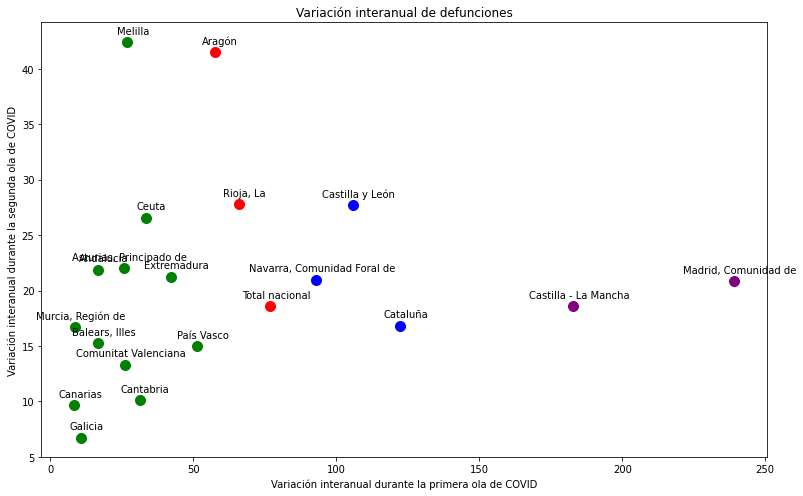

In [65]:
def situacion(x,y,z):
    fig, ax = plt.subplots()
    for i in range(20):       
      ax.text(x[i]+2,y[i]+1, z[i], color = 'black', ha = 'center', va = 'center') 
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la primera ola de COVID')
    ax.set_ylabel('Variación interanual durante la segunda ola de COVID')
    fig.set_figheight(8)
    fig.set_figwidth(13)
    fig.show()
    plt.scatter(resultado[y_means==0,0],resultado[y_means==0,1],s=100, c='purple',label='Cluster1')
    plt.scatter(resultado[y_means==1,0],resultado[y_means==1,1],s=100, c='blue',label='Cluster2')
    plt.scatter(resultado[y_means==2,0],resultado[y_means==2,1],s=100, c='green',label='Cluster3')
    plt.scatter(resultado[y_means==3,0],resultado[y_means==3,1],s=100, c='red',label='Cluster4')

situacion(resultado[:,0],resultado[:,1],comunidades)

Escalamos el modelo para que los resultados salgan dentro de un mismo rango.

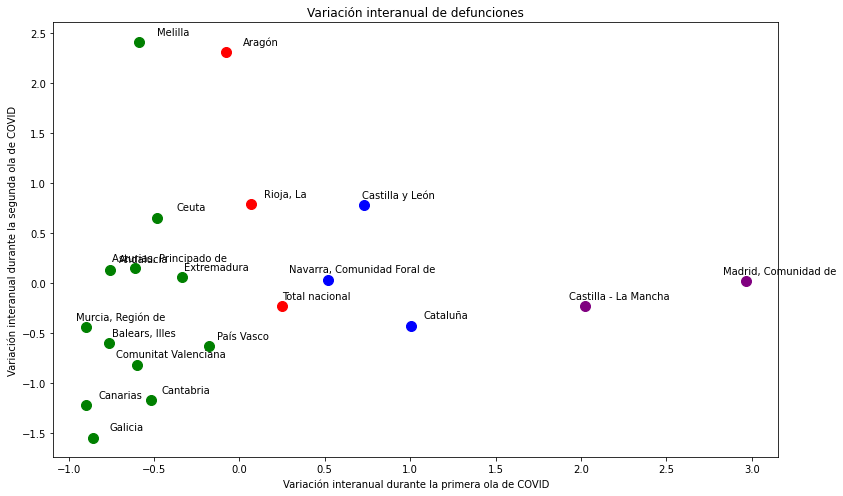

In [69]:
resultado_escalado = scale(resultado)
def situacion(x,y,z):
    fig, ax = plt.subplots()
    for i in range(20):       
      ax.text(x[i]+0.2,y[i]+0.1, z[i], color = 'black', ha = 'center', va = 'center') 
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la primera ola de COVID')
    ax.set_ylabel('Variación interanual durante la segunda ola de COVID')
    fig.set_figheight(8)
    fig.set_figwidth(13)
    fig.show()
    plt.scatter(resultado_escalado[y_means==0,0],resultado_escalado[y_means==0,1],s=100, c='purple',label='Cluster1')
    plt.scatter(resultado_escalado[y_means==1,0],resultado_escalado[y_means==1,1],s=100, c='blue',label='Cluster2')
    plt.scatter(resultado_escalado[y_means==2,0],resultado_escalado[y_means==2,1],s=100, c='green',label='Cluster3')
    plt.scatter(resultado_escalado[y_means==3,0],resultado_escalado[y_means==3,1],s=100, c='red',label='Cluster4')

situacion(resultado_escalado[:,0],resultado_escalado[:,1],comunidades)